In [2]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from google.colab import drive
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy
from PIL import Image
from scipy import ndimage
import tensorflow as tf
from tensorflow.python.framework import ops

Connecting google drive to the notebook

In [3]:
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


Loading the train and test set

In [7]:
train = h5py.File('/content/drive/MyDrive/Colab Notebooks/Neural Networks/Perso/tp_1/data/train_signs.h5', "r")
train_set_x_orig = np.array(train["train_set_x"][:])
train_set_y_orig = np.array(train["train_set_y"][:])
test = h5py.File('/content/drive/MyDrive/Colab Notebooks/Neural Networks/Perso/tp_1/data/test_signs.h5', "r")
test_set_x_orig = np.array(test["test_set_x"][:]) 
test_set_y_orig = np.array(test["test_set_y"][:]) 



Importing classes

In [8]:
classes = np.array(test_dataset["list_classes"][:]) 
train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
input_shape = train_set_x_orig[0].shape

In [9]:
train_set_y_orig,test_set_y_orig

(array([[5, 0, 2, ..., 2, 4, 5]]),
 array([[0, 0, 0, 5, 1, 0, 3, 1, 5, 1, 5, 1, 3, 1, 1, 3, 5, 4, 0, 4, 5, 4,
         2, 5, 3, 5, 4, 2, 1, 2, 3, 1, 0, 3, 1, 1, 0, 4, 2, 3, 0, 3, 0, 2,
         3, 1, 2, 2, 0, 3, 4, 1, 2, 0, 4, 0, 4, 0, 4, 4, 5, 5, 2, 4, 4, 5,
         0, 1, 3, 5, 0, 4, 1, 2, 3, 4, 3, 5, 1, 5, 2, 0, 1, 4, 2, 4, 4, 1,
         4, 5, 5, 0, 0, 5, 5, 5, 3, 3, 5, 2, 2, 2, 0, 2, 5, 3, 0, 2, 3, 4,
         1, 3, 2, 4, 2, 2, 1, 3, 1, 3]]))

THe shape represents the size of the images : 
*  Height : 64
*  Width : 64
*  RGB intesity of the 3 primary colors


In [6]:
input_shape

(64, 64, 3)

The pictures shows fingers representing numbers, labels can be numbers from 0 to 5 

In [10]:
classes

array([0, 1, 2, 3, 4, 5])

Here is a representation of a sample of images in the train set with the label corresponding

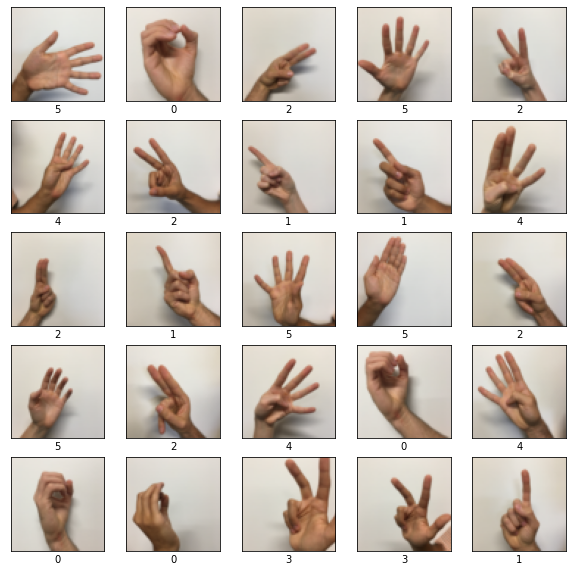

In [25]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_set_x_orig[i], cmap=plt.cm.binary)
    plt.xlabel(train["train_set_y"][i])
plt.show()

Let's normalize our data

In [27]:
print('Minimum value among our images : ',np.min(train_set_x_orig))
print('Maximum value among our images : ', np.max(train_set_x_orig))

Minimum value among our images :  4
Maximum value among our images :  244


In [28]:
X_train = train_set_x_orig.astype('float32')/255
X_test = test_set_x_orig.astype('float32')/255

In [29]:
print('Maximum value after normalization : ',np.max(X_train))
print('Minimum value after normalization : ',np.min(X_train))

Maximum value after normalization :  0.95686275
Minimum value after normalization :  0.015686275


Shapes of our Y sets : 1080 values for the training set and 120 values for the test 

In [30]:
print(train_set_y_orig.shape)
print(test_set_y_orig.shape)

(1, 1080)
(1, 120)


In [40]:
train_set_y_orig[0][:]

array([5, 0, 2, ..., 2, 4, 5])

In [42]:
Y_train = np.eye(6)[train_set_y_orig.reshape(-1)]
Y_test = np.eye(6)[test_set_y_orig.reshape(-1)]

Hot encoding into vectors, we can see that we put a 1 at the index of the 

In [43]:
Y_train

array([[0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       ...,
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.]])

In [46]:
train_set_y_orig[:,]

array([[5, 0, 2, ..., 2, 4, 5]])

Building our CNN 

In [44]:
model = Sequential()

Using REctified Linear Unit as activation function, on images of size 64 * 64 pixels with 3 RGB intensity) adding 2 convolutional layers of 32 pads each of size 3 by 3.
Then addind a pooling layer which goes by 2 * 2 matrix in order to reduce the picture. 


In [45]:
model.add(Conv2D(32, 
                 kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(64,64,3)))
model.add(Conv2D(32, 
                 kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(64,64,3)))

model.add(MaxPooling2D(pool_size=(2, 2)))

Then we flatten our 3d image to a 1D vector

In [47]:
model.add(Flatten())

And Finallhy we fully connect our CNN which has 6 possibles labels

In [48]:
model.add(Dense(6, activation='softmax'))

And compile our training CNN

In [49]:
model.compile(loss="categorical_crossentropy", optimizer=SGD(lr=0.01), metrics=["accuracy"])
model.fit(X_train, Y_train,
          epochs = 100,
          validation_data=(X_test, Y_test))

Epoch 1/100
34/34 [==============================] - 7s 15ms/step - loss: 2.3392 - accuracy: 0.1619 - val_loss: 1.7860 - val_accuracy: 0.2083
Epoch 2/100
34/34 [==============================] - 0s 7ms/step - loss: 1.7806 - accuracy: 0.2108 - val_loss: 1.7613 - val_accuracy: 0.2083
Epoch 3/100
34/34 [==============================] - 0s 7ms/step - loss: 1.7484 - accuracy: 0.2567 - val_loss: 1.6836 - val_accuracy: 0.4750
Epoch 4/100
34/34 [==============================] - 0s 7ms/step - loss: 1.6512 - accuracy: 0.3593 - val_loss: 1.5218 - val_accuracy: 0.4583
Epoch 5/100
34/34 [==============================] - 0s 7ms/step - loss: 1.5794 - accuracy: 0.3970 - val_loss: 1.4013 - val_accuracy: 0.4500
Epoch 6/100
34/34 [==============================] - 0s 7ms/step - loss: 1.4204 - accuracy: 0.4361 - val_loss: 1.3926 - val_accuracy: 0.5000
Epoch 7/100
34/34 [==============================] - 0s 7ms/step - loss: 1.2959 - accuracy: 0.5162 - val_loss: 1.3181 - val_accuracy: 0.4500
Epoch 8/100


Here on the summary we can find our 
* 2 convolutional layers
* The flatten layer
* The fully connected layer with the 6 labels 

In [50]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 60, 60, 32)        9248      
_________________________________________________________________
flatten (Flatten)            (None, 115200)            0         
_________________________________________________________________
dense (Dense)                (None, 6)                 691206    
Total params: 701,350
Trainable params: 701,350
Non-trainable params: 0
_________________________________________________________________


Now let's test the model 

In [57]:
predictions = model.predict(X_test) 

In [58]:
predictions[3]

array([5.27636101e-10, 1.38834909e-14, 6.80777587e-11, 1.40740335e-08,
       2.47944672e-06, 9.99997497e-01], dtype=float32)

In [59]:
test_set_y_orig

array([[0, 0, 0, 5, 1, 0, 3, 1, 5, 1, 5, 1, 3, 1, 1, 3, 5, 4, 0, 4, 5, 4,
        2, 5, 3, 5, 4, 2, 1, 2, 3, 1, 0, 3, 1, 1, 0, 4, 2, 3, 0, 3, 0, 2,
        3, 1, 2, 2, 0, 3, 4, 1, 2, 0, 4, 0, 4, 0, 4, 4, 5, 5, 2, 4, 4, 5,
        0, 1, 3, 5, 0, 4, 1, 2, 3, 4, 3, 5, 1, 5, 2, 0, 1, 4, 2, 4, 4, 1,
        4, 5, 5, 0, 0, 5, 5, 5, 3, 3, 5, 2, 2, 2, 0, 2, 5, 3, 0, 2, 3, 4,
        1, 3, 2, 4, 2, 2, 1, 3, 1, 3]])

Below we can see the predictions of labels made by the model

In [62]:
print(list(map(np.argmax, predictions[:7])))
print(Y_test[:7])

[0, 0, 0, 5, 1, 0, 3]
[[1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]]


In [114]:
def check_prediction(prediction_label, real_label, images, img_index, names):
  if np.argmax(prediction_label[img_index]) == np.where(real_label[img_index])[0][0]:
    plt.figure()
    plt.imshow(images[img_index])
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(color='blue', xlabel ="predicted : {} | {}% | real : {}".format(
        names[np.argmax(prediction_label[img_index])], round(max(prediction_label[img_index])*100)
        ,names[int(np.where(real_label[img_index])[0][0])]))
  else:
    plt.figure()
    plt.imshow(images[img_index])
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(color='red', xlabel ="predicted : {} | {}% | real : {}".format(names[np.argmax(prediction_label[img_index])], round(max(prediction_label[img_index])*100),names[int(real_label[img_index][0])]))

<Figure size 720x720 with 0 Axes>

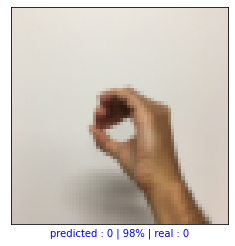

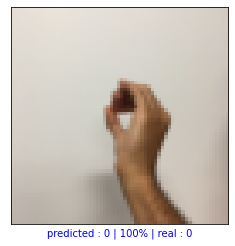

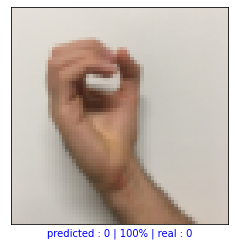

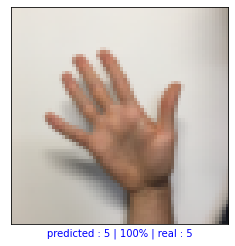

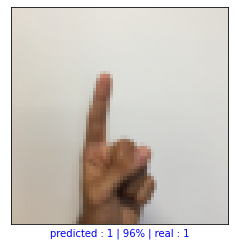

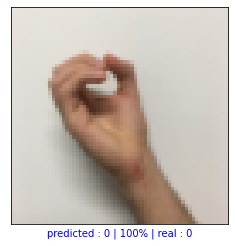

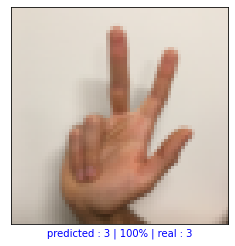

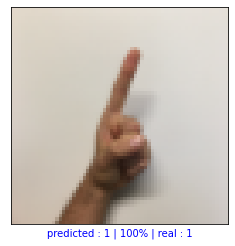

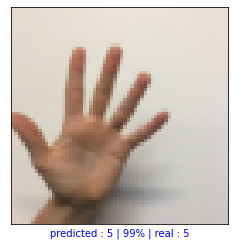

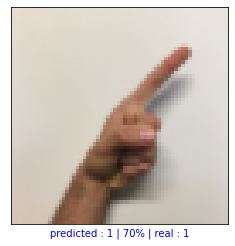

In [115]:
plt.figure(figsize=(10,10)) 

for i in range(10):
  
    check_prediction(predictions, Y_test, X_test, i, classes)

plt.show()